In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os 
cwd = os.getcwd()
print(cwd)

pd.options.display.max_columns = None
pd.options.display.width=None
pd.options.display.float_format = '{:,.6}'.format

#from tabulate import tabulate


/content


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('Boston.csv')

df.columns
df.shape
df.dtypes
df.info()
df.head()
df.describe().T

print('NA Counts ================>>>')
df.isna().sum().sum()
df.isna().sum()

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'NOX'],
      dtype='object')

(506, 14)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
NOX        float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   RM       506 non-null    float64
 5   AGE      505 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        498 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
 13  NOX      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOX
0,0.00632,18.0,2.31,0,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0,0.538
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6,0.469
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.469
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.458
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2,0.458


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61352,8.60155,0.00632,0.082045,0.25651,3.67708,88.9762
ZN,506.0,11.3636,23.3225,0.0,0.0,0.0,12.5,100.0
INDUS,506.0,11.1368,6.86035,0.46,5.19,9.69,18.1,27.74
CHAS,506.0,0.06917,0.253994,0.0,0.0,0.0,0.0,1.0
RM,506.0,6.28463,0.702617,3.561,5.8855,6.2085,6.6235,8.78
AGE,505.0,68.3177,28.2642,1.5166,44.4,77.0,93.9,100.0
DIS,506.0,3.79504,2.10571,1.1296,2.10018,3.20745,5.18843,12.1265
RAD,506.0,9.54941,8.70726,1.0,4.0,5.0,24.0,24.0
TAX,506.0,408.237,168.537,187.0,279.0,330.0,666.0,711.0
PTRATIO,506.0,18.4555,2.16495,12.6,17.4,19.05,20.2,22.0


NA Counts ================>>>


9

CRIM       0
ZN         0
INDUS      0
CHAS       0
RM         0
AGE        1
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          8
LSTAT      0
MEDV       0
NOX        0
dtype: int64

Number of duplicate rows = 0


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOX


Before (506, 14)
After (506, 14)


Thus there aren't a lot of cells missing so we can delete the rows containing the missing data

In [4]:
dff = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV','NOX']]

Q1 = dff.quantile(0.25)
Q3 = dff.quantile(0.75)
IQR = Q3 - Q1

dff.columns
df_items = pd.DataFrame()

df_items['RecCount'] = dff.count()
df_items['Min'] = dff.min()
df_items['Max'] = dff.max()
df_items['Range'] = dff.max() - dff.min()

df_items['Mean'] = dff.mean()
df_items['Median'] = dff.median()
df_items['Q1'] = dff.quantile(0.25)
df_items['Q2'] = dff.quantile(0.50)
df_items['Q3'] = dff.quantile(0.75)
df_items['IQR'] = dff.quantile(0.75) - dff.quantile(0.25)
df_items['Skew'] = dff.skew()
df_items['Kurtosis'] = dff.kurtosis()
df_items['StdDev'] = dff.std()
df_items['Variance'] = dff.var()
df_items['Left3Std'] = df_items['Mean'] - 3 * df_items['StdDev']
df_items['Right3Std'] = df_items['Mean'] + 3 * df_items['StdDev']

df_items['OutlierCount'] = ((dff < (Q1 - 1.5 * IQR)) | (dff > (Q3 + 1.5 * IQR))).sum()

df_items.round(2) 

Index(['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV', 'NOX'],
      dtype='object')

,RecCount,Min,Max,Range,Mean,Median,Q1,Q2,Q3,IQR,Skew,Kurtosis,StdDev,Variance,Left3Std,Right3Std,OutlierCount
CRIM,506,0.01,88.98,88.97,3.61,0.26,0.08,0.26,3.68,3.6,5.22,37.13,8.6,73.99,-22.19,29.42,66
ZN,506,0.0,100.0,100.0,11.36,0.0,0.0,0.0,12.5,12.5,2.23,4.03,23.32,543.94,-58.6,81.33,68
INDUS,506,0.46,27.74,27.28,11.14,9.69,5.19,9.69,18.1,12.91,0.3,-1.23,6.86,47.06,-9.44,31.72,0
RM,506,3.56,8.78,5.22,6.28,6.21,5.89,6.21,6.62,0.74,0.4,1.89,0.7,0.49,4.18,8.39,30
AGE,505,1.52,100.0,98.48,68.32,77.0,44.4,77.0,93.9,49.5,-0.6,-0.96,28.26,798.87,-16.48,153.11,0
DIS,506,1.13,12.13,11.0,3.8,3.21,2.1,3.21,5.19,3.09,1.01,0.49,2.11,4.43,-2.52,10.11,5
TAX,506,187.0,711.0,524.0,408.24,330.0,279.0,330.0,666.0,387.0,0.67,-1.14,168.54,"28,404.8",-97.37,913.85,0
PTRATIO,506,12.6,22.0,9.4,18.46,19.05,17.4,19.05,20.2,2.8,-0.8,-0.29,2.16,4.69,11.96,24.95,15
B,498,10.48,396.9,386.42,362.33,391.77,376.25,391.77,396.27,20.02,-3.17,9.25,80.25,"6,440.7",121.57,603.09,70
LSTAT,506,0.32,37.97,37.65,12.42,11.04,6.76,11.04,16.46,9.7,0.94,0.6,7.14,51.03,-9.01,33.85,7


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61352,8.60155,0.00632,0.082045,0.25651,3.67708,88.9762
ZN,506.0,11.3636,23.3225,0.0,0.0,0.0,12.5,100.0
INDUS,506.0,11.1368,6.86035,0.46,5.19,9.69,18.1,27.74
CHAS,506.0,0.06917,0.253994,0.0,0.0,0.0,0.0,1.0
RM,506.0,6.28463,0.702617,3.561,5.8855,6.2085,6.6235,8.78
AGE,505.0,68.3177,28.2642,1.5166,44.4,77.0,93.9,100.0
DIS,506.0,3.79504,2.10571,1.1296,2.10018,3.20745,5.18843,12.1265
RAD,506.0,9.54941,8.70726,1.0,4.0,5.0,24.0,24.0
TAX,506.0,408.237,168.537,187.0,279.0,330.0,666.0,711.0
PTRATIO,506.0,18.4555,2.16495,12.6,17.4,19.05,20.2,22.0


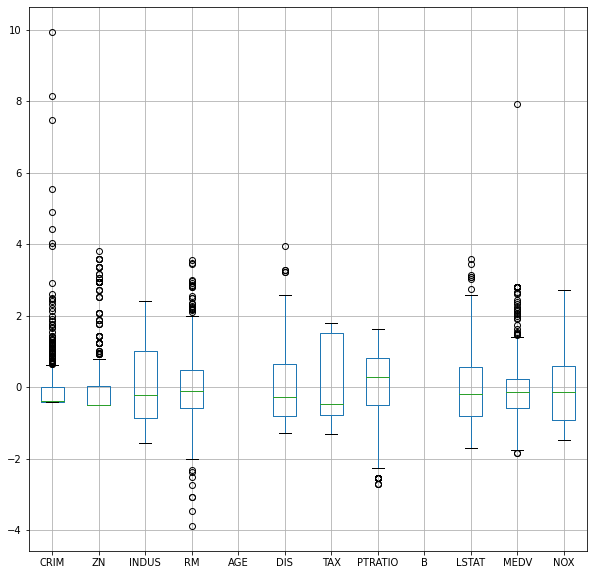

In [6]:
# Scaling the data because 

from scipy.stats import zscore

df_selected = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV','NOX']]

data=df_selected.apply(zscore)
data.boxplot(figsize=(10,10))

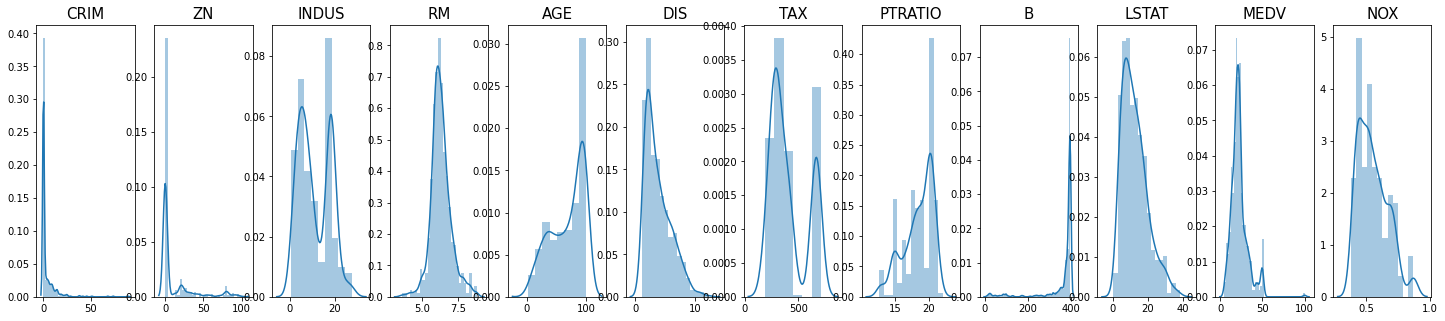

In [7]:
items = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV','NOX']

fig, ax = plt.subplots(nrows=1, ncols=12, figsize=(25,5))
i = 0 
for item in items:
    axx=ax[i]
    null = sns.distplot(df[[item]], ax = axx, label=item, hist=True, rug=False).set_title(item, fontsize=15)
    i=i+1

In [8]:
df[df['AGE'].isna()]
for column in df[['AGE']]:
    median = dff[column].median()
    df[column] = df[column].fillna(median)
df[df['AGE'].isna()]
df.isna().sum().sum()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOX
410,51.1358,0.0,18.1,0,5.757,nan,1.413,24,666,20.2,nan,2.6,10.11,0.597


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOX


8

In [9]:
df[df['B'].isna()]
for column in df[['B']]:
    median = dff[column].median()
    df[column] = df[column].fillna(median)
df[df['B'].isna()]
df.isna().sum().sum()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOX
410,51.1358,0.0,18.1,0,5.757,77.0,1.413,24,666,20.2,nan,2.6,10.11,0.597
423,7.05042,0.0,18.1,0,6.103,85.1,2.0218,24,666,20.2,nan,2.52,23.29,0.614
424,8.79212,0.0,18.1,0,5.565,70.6,2.0635,24,666,20.2,nan,3.65,17.16,0.584
425,15.8603,0.0,18.1,0,5.896,95.4,1.9096,24,666,20.2,nan,7.68,24.39,0.679
437,15.1772,0.0,18.1,0,6.152,100.0,1.9142,24,666,20.2,nan,9.32,26.45,0.74
450,6.71772,0.0,18.1,0,6.749,92.6,2.3236,24,666,20.2,nan,0.32,17.44,0.713
454,9.51363,0.0,18.1,0,6.728,94.1,2.4961,24,666,20.2,nan,6.68,18.71,0.713
457,8.20058,0.0,18.1,0,5.936,80.3,2.7792,24,666,20.2,nan,3.5,16.94,0.713


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOX


0

In [0]:
def get_whiskers(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [0]:
for feature in df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']]: 
    lr,ur=get_whiskers(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

In [12]:
df.shape
df.head()

(506, 14)

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOX
0,0.00632,18.0,2.31,0,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0,0.538
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6,0.469
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.469
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.458
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,3,222.0,18.7,396.9,5.33,36.2,0.458


In [13]:
dff.corr().round(4)

def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(df, 10).round(3)

,CRIM,ZN,INDUS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,NOX
CRIM,1.0,-0.2005,0.4066,-0.2192,0.3513,-0.3797,0.5828,0.2899,-0.3577,0.4204,-0.3624,0.421
ZN,-0.2005,1.0,-0.5338,0.312,-0.5635,0.6644,-0.3146,-0.3917,0.1669,-0.3969,0.3261,-0.5166
INDUS,0.4066,-0.5338,1.0,-0.3917,0.6327,-0.708,0.7208,0.3832,-0.3399,0.5703,-0.4236,0.7637
RM,-0.2192,0.312,-0.3917,1.0,-0.2315,0.2052,-0.292,-0.3555,0.1297,-0.6066,0.637,-0.3022
AGE,0.3513,-0.5635,0.6327,-0.2315,1.0,-0.7365,0.5029,0.2711,-0.2436,0.5761,-0.3788,0.7096
DIS,-0.3797,0.6644,-0.708,0.2052,-0.7365,1.0,-0.5344,-0.2325,0.279,-0.471,0.2081,-0.7692
TAX,0.5828,-0.3146,0.7208,-0.292,0.5029,-0.5344,1.0,0.4609,-0.4054,0.4937,-0.4251,0.668
PTRATIO,0.2899,-0.3917,0.3832,-0.3555,0.2711,-0.2325,0.4609,1.0,-0.1468,0.3475,-0.4995,0.1889
B,-0.3577,0.1669,-0.3399,0.1297,-0.2436,0.279,-0.4054,-0.1468,1.0,-0.3575,0.2456,-0.3693
LSTAT,0.4204,-0.3969,0.5703,-0.6066,0.5761,-0.471,0.4937,0.3475,-0.3575,1.0,-0.6595,0.5573


,FirstVariable,SecondVariable,Correlation
0,CRIM,RAD,0.927
1,RAD,TAX,0.91
2,CRIM,TAX,0.871
3,DIS,NOX,-0.776
4,LSTAT,MEDV,-0.77
5,INDUS,NOX,0.764
6,AGE,DIS,-0.742
7,INDUS,TAX,0.721
8,INDUS,DIS,-0.713
9,AGE,NOX,0.71


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [15]:
df['NOX'].isnull().values.any()

False

In [0]:
df_safe=df

In [17]:
from scipy.stats import zscore
df= df_safe
#df['price'] = df['price'].astype(np.float64)
df_scaled = df.apply(zscore)


#items = ['carat', 'depth', 'table', 'length', 'width', 'height', 'price']
#df_scaled[['carat']] = df_scaled[['carat']].apply(zscore)

x=df_scaled.drop(['NOX'], axis=1) #name is splitted in Model and Brand; Year is transformed to CarAge
#x=df_scaled.drop(['price', 'width', 'height'], axis=1) #name is splitted in Model and Brand; Year is transformed to CarAge
y=df_scaled.NOX
x.head()
y.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.67029,0.91842,-1.28791,-0.272599,0.475982,-0.11112,0.148015,-0.982843,-0.666608,-1.47718,0.786241,-1.05875,0.265605
1,-0.663949,-0.579471,-0.593381,-0.272599,0.23139,0.374506,0.572202,-0.867883,-0.987329,-0.309941,0.786241,-0.462381,-0.0544025
2,-0.663955,-0.579471,-0.593381,-0.272599,1.44482,-0.256454,0.572202,-0.867883,-0.987329,-0.309941,0.553838,-1.19495,1.69231
3,-0.66242,-0.579471,-1.30688,-0.272599,1.14782,-0.798796,1.10182,-0.752922,-1.10612,0.110265,0.656621,-1.35121,1.51897
4,-0.651339,-0.579471,-1.30688,-0.272599,1.38447,-0.50104,1.10182,-0.752922,-1.10612,0.110265,0.786241,-1.00858,1.89231


0   -0.144217
1   -0.740262
2   -0.740262
3   -0.835284
4   -0.835284
Name: NOX, dtype: float64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

x_train.shape
y_train.shape

x_test.shape
y_test.shape

x_train.dtypes
y_train.dtypes

x_test.dtypes
y_test.dtypes

(404, 13)

(404,)

(102, 13)

(102,)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

dtype('float64')

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

dtype('float64')

In [19]:
from scipy.stats import zscore
#ss=StandardScaler() 
# we are scaling the data for ANN and Linear Regression Without scaling it will give very poor results. Computations becomes easier
#x_train_scaled=ss.fit_transform(x_train)
#x_test_scaled=ss.transform(x_test)
df.info()
#x_train_scaled  = x_train.apply(zscore)
#x_test_scaled = x_test.apply(zscore)
#y_train_scaled = y_train.apply(zscore)
#y_test_scaled = y_test.apply(zscore)

x_train_scaled = x_train
x_test_scaled = x_test
y_train_scaled = y_train
y_test_scaled = y_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
 13  NOX      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


In [20]:
regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
intercept = regression_model.intercept_

print("The intercept is {}".format(intercept))

The intercept is -0.0021807530438287363


In [22]:
# R square on training data
r_square = regression_model.score(x_train_scaled, y_train_scaled)

#n is the sample size
#p is the total number of explanatory variables
p=13
n=5656
adj_r_square = 1-(1-r_square)*(n-1)/(n-p-1)

print('R Square : %.4f' % r_square, '    ', 'Adj. R Square : %.4f' % adj_r_square)

R Square : 0.7890      Adj. R Square : 0.7885


In [23]:
# R square on testing data
r_square = regression_model.score(x_test_scaled, y_test_scaled)

#n is the sample size
#p is the total number of explanatory variables
p=8
n=18847
adj_r_square = 1-(1-r_square)*(n-1)/(n-p-1)

print('R Square : %.4f' % r_square, '    ', 'Adj. R Square : %.4f' % adj_r_square)

R Square : 0.7117      Adj. R Square : 0.7116


In [24]:
# Calculate MSE
import math
mse = np.mean((regression_model.predict(x_train_scaled)-y_train_scaled)**2)
math.sqrt(mse)

np.sqrt(mean_squared_error(y_train_scaled,regression_model.predict(x_train_scaled)))

np.sqrt(mean_squared_error(y_test_scaled,regression_model.predict(x_test_scaled)))

0.4632443814427396

0.46324438144273966

0.517256305107976

In [25]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single datafr
from scipy.stats import zscore

#X_train_scaled  = X_train.apply(zscore)
#X_test_scaled = X_test.apply(zscore)
#y_train_scaled = y_train.apply(zscore)
#y_test_scaled = y_test.apply(zscore)

data_train = pd.concat([x_train, y_train], axis=1)
#data_train_scaled = data_train.apply(zscore)
data_train_scaled = data_train
data_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,NOX
42,-0.629451,-0.579471,-0.616727,-0.272599,-0.168852,-2.18833,0.936758,-0.752922,-1.04078,-0.263252,0.0136584,-0.939767,0.438943,-0.921667
58,-0.625539,1.50093,-0.876445,-0.272599,-0.20697,-1.38722,1.94942,-0.17812,-0.73788,0.577161,0.43107,-0.78924,0.17227,-0.878475
385,2.06781,-0.579471,1.016,-0.272599,-1.58558,1.05509,-1.14031,1.66125,1.53093,0.810609,0.786241,2.64421,-1.97445,1.25519
78,-0.655142,-0.579471,0.247057,-0.272599,-0.0687912,-0.518763,0.594933,-0.523001,-0.0608014,0.110265,0.186676,-0.00363214,-0.107737,-1.01669
424,1.98397,-0.579471,1.016,-0.272599,-1.12816,0.0802945,-0.832051,1.66125,1.53093,0.810609,0.49331,-1.24942,-0.646417,0.253146


In [26]:
#Build a model to predict y using x1,x2 and x3. Note down R-Square and Adj R-Square values 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data_train[["CRIM"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
import statsmodels.formula.api as sm
model = sm.ols(formula='NOX~CRIM', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     319.6
Date:                Tue, 26 May 2020   Prob (F-statistic):           5.03e-53
Time:                        03:02:56   Log-Likelihood:                -458.50
No. Observations:                 404   AIC:                             921.0
Df Residuals:                     402   BIC:                             929.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0052      0.038     -0.139      0.890      -0.079       0.069
CRIM           0.6770      0.038     17.879      0.000       0.603       0.751
==============================================================================
Omnibus:                      126.429   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.709
Skew:                           1.516   Prob(JB):                     2.08e-73
Kurtosis:                       6.270   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data_train[["CRIM"]+["ZN"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
model = sm.ols(formula='NOX~CRIM+ZN', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     245.1
Date:                Tue, 26 May 2020   Prob (F-statistic):           2.94e-70
Time:                        03:02:56   Log-Likelihood:                -415.38
No. Observations:                 404   AIC:                             836.8
Df Residuals:                     401   BIC:                             848.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0005      0.034     -0.014      0.989      -0.067       0.066
CRIM           0.5426      0.037     14.765      0.000       0.470       0.615
ZN            -0.3539      0.036     -9.768      0.000      -0.425      -0.283
==============================================================================
Omnibus:                      149.567   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.795
Skew:                           1.701   Prob(JB):                    5.94e-108
Kurtosis:                       7.215   Cond. No.                         1.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     251.8
Date:                Tue, 26 May 2020   Prob (F-statistic):           9.43e-92
Time:                        03:02:56   Log-Likelihood:                -362.40
No. Observations:                 404   AIC:                             732.8
Df Residuals:                     400   BIC:                             748.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0031      0.030     -0.105      0.917      -0.061       0.055
CRIM           0.3136      0.038      8.156      0.000       0.238       0.389
ZN            -0.1542      0.037     -4.206      0.000      -0.226      -0.082
INDUS          0.4822      0.044     10.952      0.000       0.396       0.569
==============================================================================
Omnibus:                      122.198   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              346.971
Skew:                           1.427   Prob(JB):                     4.53e-76
Kurtosis:                       6.531   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS+CHAS', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     194.2
Date:                Tue, 26 May 2020   Prob (F-statistic):           3.04e-92
Time:                        03:02:56   Log-Likelihood:                -358.36
No. Observations:                 404   AIC:                             726.7
Df Residuals:                     399   BIC:                             746.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0062      0.029     -0.211      0.833      -0.064       0.052
CRIM           0.3235      0.038      8.451      0.000       0.248       0.399
ZN            -0.1538      0.036     -4.232      0.000      -0.225      -0.082
INDUS          0.4719      0.044     10.774      0.000       0.386       0.558
CHAS           0.0789      0.028      2.839      0.005       0.024       0.134
==============================================================================
Omnibus:                      117.384   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.164
Skew:                           1.387   Prob(JB):                     4.95e-70
Kurtosis:                       6.356   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["RM"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["RM"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS+CHAS+RM', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     155.0
Date:                Tue, 26 May 2020   Prob (F-statistic):           4.51e-91
Time:                        03:02:56   Log-Likelihood:                -358.36
No. Observations:                 404   AIC:                             728.7
Df Residuals:                     398   BIC:                             752.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0062      0.029     -0.211      0.833      -0.064       0.052
CRIM           0.3235      0.038      8.441      0.000       0.248       0.399
ZN            -0.1537      0.037     -4.141      0.000      -0.227      -0.081
INDUS          0.4716      0.045     10.502      0.000       0.383       0.560
CHAS           0.0790      0.028      2.822      0.005       0.024       0.134
RM            -0.0007      0.033     -0.022      0.982      -0.066       0.065
==============================================================================
Omnibus:                      117.332   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.834
Skew:                           1.387   Prob(JB):                     5.84e-70
Kurtosis:                       6.354   Cond. No.                         2.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####RM has no effect on model - so we ignore it 

In [36]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS+CHAS+AGE', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 26 May 2020   Prob (F-statistic):          5.56e-107
Time:                        03:02:56   Log-Likelihood:                -321.05
No. Observations:                 404   AIC:                             654.1
Df Residuals:                     398   BIC:                             678.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0039      0.027     -0.146      0.884      -0.057       0.049
CRIM           0.2526      0.036      7.051      0.000       0.182       0.323
ZN            -0.0401      0.036     -1.130      0.259      -0.110       0.030
INDUS          0.3664      0.042      8.794      0.000       0.285       0.448
CHAS           0.0593      0.025      2.327      0.020       0.009       0.109
AGE            0.3396      0.038      8.986      0.000       0.265       0.414
==============================================================================
Omnibus:                      114.066   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.723
Skew:                           1.375   Prob(JB):                     4.50e-64
Kurtosis:                       6.125   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS+CHAS+AGE+DIS', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     193.9
Date:                Tue, 26 May 2020   Prob (F-statistic):          1.15e-114
Time:                        03:02:56   Log-Likelihood:                -300.21
No. Observations:                 404   AIC:                             614.4
Df Residuals:                     397   BIC:                             642.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0035      0.026     -0.136      0.892      -0.054       0.047
CRIM           0.2176      0.034      6.312      0.000       0.150       0.285
ZN             0.0537      0.037      1.464      0.144      -0.018       0.126
INDUS          0.3008      0.041      7.363      0.000       0.221       0.381
CHAS           0.0447      0.024      1.838      0.067      -0.003       0.092
AGE            0.2198      0.040      5.452      0.000       0.141       0.299
DIS           -0.3119      0.047     -6.568      0.000      -0.405      -0.219
==============================================================================
Omnibus:                      111.259   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.047
Skew:                           1.342   Prob(JB):                     3.44e-62
Kurtosis:                       6.100   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["RAD"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["RAD"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS+CHAS+AGE+RAD', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     168.4
Date:                Tue, 26 May 2020   Prob (F-statistic):          8.20e-106
Time:                        03:02:56   Log-Likelihood:                -321.04
No. Observations:                 404   AIC:                             656.1
Df Residuals:                     397   BIC:                             684.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0039      0.027     -0.147      0.883      -0.057       0.049
CRIM           0.2406      0.076      3.167      0.002       0.091       0.390
ZN            -0.0400      0.036     -1.124      0.262      -0.110       0.030
INDUS          0.3659      0.042      8.750      0.000       0.284       0.448
CHAS           0.0590      0.026      2.307      0.022       0.009       0.109
AGE            0.3404      0.038      8.941      0.000       0.266       0.415
RAD            0.0129      0.072      0.179      0.858      -0.128       0.154
==============================================================================
Omnibus:                      115.579   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.610
Skew:                           1.386   Prob(JB):                     5.29e-66
Kurtosis:                       6.190   Cond. No.                         6.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###RAD has no effect 

In [42]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["TAX"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["TAX"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS+CHAS+AGE+TAX', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 26 May 2020   Prob (F-statistic):          5.00e-106
Time:                        03:02:56   Log-Likelihood:                -320.53
No. Observations:                 404   AIC:                             655.1
Df Residuals:                     397   BIC:                             683.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0028      0.027     -0.105      0.917      -0.056       0.050
CRIM           0.2070      0.058      3.599      0.000       0.094       0.320
ZN            -0.0429      0.036     -1.204      0.229      -0.113       0.027
INDUS          0.3467      0.046      7.541      0.000       0.256       0.437
CHAS           0.0607      0.026      2.382      0.018       0.011       0.111
AGE            0.3417      0.038      9.027      0.000       0.267       0.416
TAX            0.0631      0.062      1.013      0.312      -0.059       0.186
==============================================================================
Omnibus:                      119.908   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.029
Skew:                           1.420   Prob(JB):                     2.64e-71
Kurtosis:                       6.353   Cond. No.                         5.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Tax has no effect 

In [44]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["PTRATIO"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["PTRATIO"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS+CHAS+AGE+PTRATIO', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     200.7
Date:                Tue, 26 May 2020   Prob (F-statistic):          7.02e-117
Time:                        03:02:56   Log-Likelihood:                -295.01
No. Observations:                 404   AIC:                             604.0
Df Residuals:                     397   BIC:                             632.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0025      0.025     -0.100      0.921      -0.052       0.047
CRIM           0.3201      0.035      9.187      0.000       0.252       0.389
ZN            -0.1229      0.035     -3.494      0.001      -0.192      -0.054
INDUS          0.3848      0.039      9.817      0.000       0.308       0.462
CHAS           0.0344      0.024      1.425      0.155      -0.013       0.082
AGE            0.3055      0.036      8.537      0.000       0.235       0.376
PTRATIO       -0.2220      0.030     -7.391      0.000      -0.281      -0.163
==============================================================================
Omnibus:                       34.357   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                           0.662   Prob(JB):                     2.71e-10
Kurtosis:                       3.930   Cond. No.                         3.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["PTRATIO"]+["B"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["PTRATIO"]+["B"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS+CHAS+AGE+PTRATIO+B', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     172.9
Date:                Tue, 26 May 2020   Prob (F-statistic):          3.17e-116
Time:                        03:02:56   Log-Likelihood:                -293.79
No. Observations:                 404   AIC:                             603.6
Df Residuals:                     396   BIC:                             635.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0020      0.025     -0.079      0.937      -0.052       0.048
CRIM           0.3109      0.035      8.806      0.000       0.241       0.380
ZN            -0.1221      0.035     -3.479      0.001      -0.191      -0.053
INDUS          0.3724      0.040      9.324      0.000       0.294       0.451
CHAS           0.0336      0.024      1.395      0.164      -0.014       0.081
AGE            0.3045      0.036      8.524      0.000       0.234       0.375
PTRATIO       -0.2147      0.030     -7.076      0.000      -0.274      -0.155
B             -0.0436      0.028     -1.546      0.123      -0.099       0.012
==============================================================================
Omnibus:                       29.692   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.792
Skew:                           0.606   Prob(JB):                     1.03e-08
Kurtosis:                       3.846   Cond. No.                         3.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
lr.fit(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["PTRATIO"]+["B"]+["LSTAT"]], data_train[["NOX"]])
predictions = lr.predict(data_train[["CRIM"]+["ZN"]+["INDUS"]+["CHAS"]+["AGE"]+["DIS"]+["PTRATIO"]+["B"]+["LSTAT"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
model = sm.ols(formula='NOX~CRIM+ZN+INDUS+CHAS+AGE+PTRATIO+B+LSTAT', data=data_train)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     151.4
Date:                Tue, 26 May 2020   Prob (F-statistic):          2.85e-115
Time:                        03:02:56   Log-Likelihood:                -293.36
No. Observations:                 404   AIC:                             604.7
Df Residuals:                     395   BIC:                             640.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0029      0.025     -0.114      0.910      -0.052       0.047
CRIM           0.3058      0.036      8.555      0.000       0.236       0.376
ZN            -0.1223      0.035     -3.481      0.001      -0.191      -0.053
INDUS          0.3675      0.040      9.117      0.000       0.288       0.447
CHAS           0.0354      0.024      1.465      0.144      -0.012       0.083
AGE            0.2921      0.038      7.645      0.000       0.217       0.367
PTRATIO       -0.2183      0.031     -7.134      0.000      -0.278      -0.158
B             -0.0410      0.028     -1.446      0.149      -0.097       0.015
LSTAT          0.0317      0.035      0.917      0.360      -0.036       0.100
==============================================================================
Omnibus:                       28.233   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.208
Skew:                           0.595   Prob(JB):                     3.73e-08
Kurtosis:                       3.784   Cond. No.                         3.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""